In [30]:
import math
import numpy as np
from scipy.stats import binom
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
import pandas as pd

# Sum the point probablities to receive cumulative distribution. This has a much higher precision then using binom.cdf directly
def binom_cdf_pmf(n, p, accepted_majority_share):
    # Calculate the start of the range via accepted majority share
    x_start = int(np.ceil(n * accepted_majority_share))  # use np.ceil to round up to the nearest integer

    # Sum up the probabilities of k participants signing malicously, for every k from x_start to n
    prob = math.fsum(binom.pmf(k, n, p) for k in range(x_start, n + 1))
    return prob

from scipy.stats import hypergeom

def hypergeom_cdf_pmf(M, p, accepted_majority_share):
    # Calculate the total number of success states in the population (malicious participants)
    n = int(p * M)
    
    # Calculate the start of the range via accepted majority share
    N_start = int(np.ceil(M * accepted_majority_share))  # use np.ceil to round up to the nearest integer

    # Sum up the probabilities of N malicious participants being drawn, for every N from N_start to M
    prob = math.fsum(hypergeom.pmf(N, M, n, N) for N in range(N_start, M + 1))
    return prob

## Probability of Collusion:
This script visualizes the probability of a wrong decision being made in a voting scenario with a certain accepted majority share, given varying levels of dishonest participants. The decision making process is assumed to be a binomial process, where each participant either acts honestly or dishonestly with a certain probability.

The script generates a series of plots, one for each specified accepted majority share. On each plot, the x-axis represents the probability of a participant acting dishonestly, and the y-axis represents the corresponding probability of the collective decision being wrong. The probabilities are computed using the cumulative binomial distribution.

Additionally, for each accepted majority share, specific points (defined by marker_p_values) are highlighted on the plot, and the exact dishonesty probability and corresponding wrong decision probability at these points are annotated.

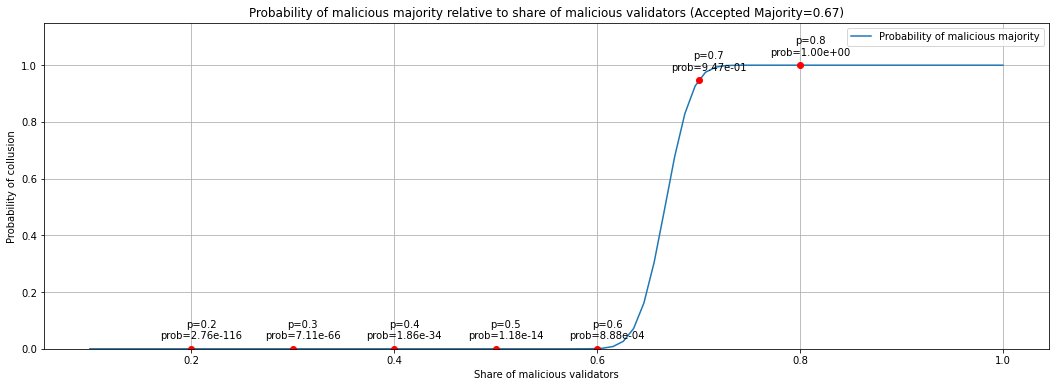

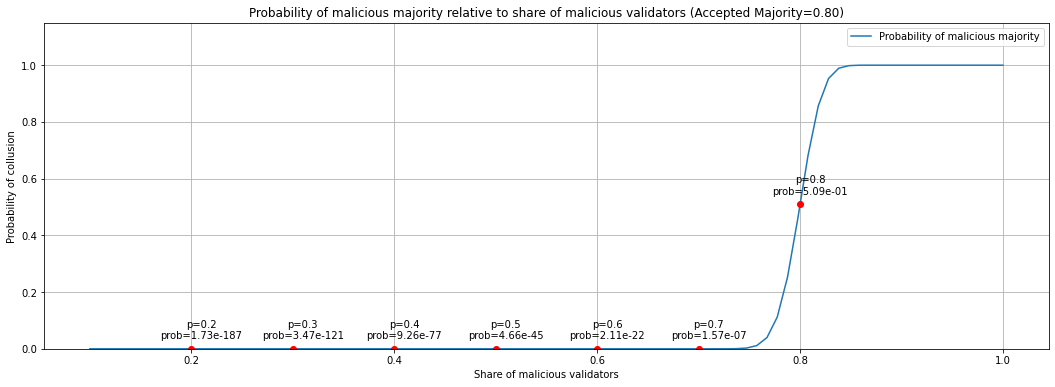

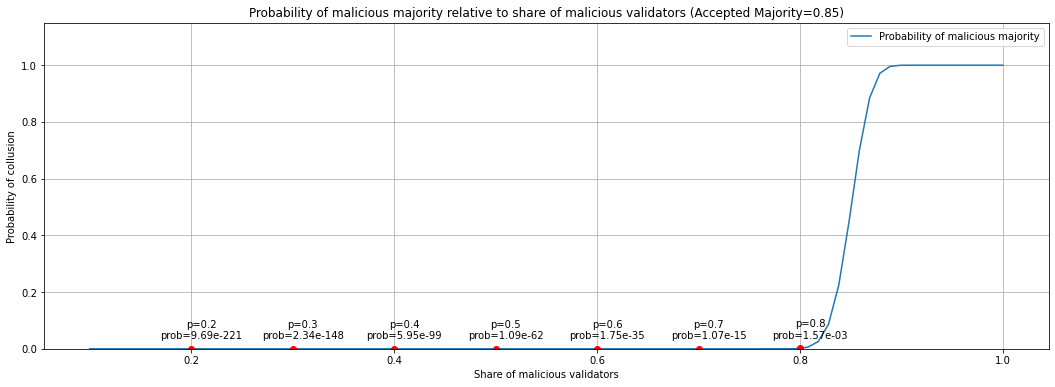

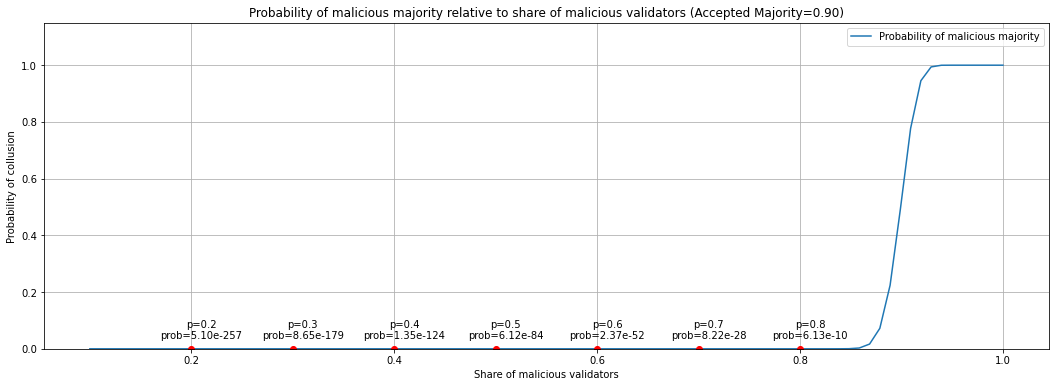

In [33]:
# Set the total number of participants
n = 512

# Define the accepted majorities for which to calculate probabilities
accepted_majorities = [2/3, 0.8, 0.85, 0.9]

# Define specific points for which the probability of collusion will be marked on the plot
marker_p_values =[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# Create an array of probabilities ranging from 0.1 to 1.
# We start at 0.1 to avoid an underflow that occures when computing with small p values
p_values = np.linspace(0.1, 1, 90)

# For each accepted majority value, calculate the cumulative binomial distribution and plot it
for majority in accepted_majorities:

    # Compute the cumulative binomial probabilities for each p value using the binom_cdf_pmf function
    probabilities = [(binom_cdf_pmf(n, p, majority)) for p in p_values]

    # Initialize a new plot
    plt.figure(figsize=(18, 6))
    plt.ylim(0, 1.15)

    # Plot the probabilities against the p values
    plt.plot(p_values, probabilities, label=f'Probability of malicious majority')

    # Compute the probabilities for the marker points
    marker_probs = [(binom_cdf_pmf(n, p, majority)) for p in marker_p_values]

    # Add the markers to the plot
    plt.plot(marker_p_values, marker_probs, 'ro')

    # Add annotations for each marker point
    for (p, prob) in zip(marker_p_values, marker_probs):
        plt.annotate(f'p={p}\nprob={prob:.2e}', (p, prob), textcoords="offset points", xytext=(10,10), ha='center')

    # Add labels and title to the plot
    plt.xlabel('Share of malicious validators')
    plt.ylabel('Probability of collusion')
    plt.title(f'Probability of malicious majority relative to share of malicious validators (Accepted Majority={majority:.2f})')
    
    # Add legend and grid to the plot
    plt.legend()
    plt.grid(True)

    # Display the plot
    plt.show()

 


## Probability Chart:
This script calculates and presents in a table format the probabilities of an incorrect decision in a voting scenario, for varying levels of dishonesty and different accepted majority thresholds. Each cell in the table represents the probability of an incorrect decision for a specific combination of dishonesty probability and accepted majority threshold.

In [34]:
# Total committee members
n = 512

# Define the accepted majorities to simulate
accepted_majorities = [2/3, 0.8, 0.85, 0.9]

# Define the range of p values for which to compute the probabilities
# Start from 0, end at 1, and step by 0.1
p_values_frame = np.arange(0, 1.1, 0.1)

# Initialize an empty DataFrame with p_values_frame as the index
# The index represents the p values used to compute the probabilities
prob = pd.DataFrame(index=p_values_frame)

# Label the index column as "p values"
prob.index.name = "p values"

# For each accepted majority share, compute the probability for each p value
# and add these probabilities as a new column in the DataFrame
for majority in accepted_majorities:
    # Compute the probabilities using the binom_cdf_pmf function
    probabilities = [binom_cdf_pmf(n, p, majority) for p in p_values_frame]

    # Add the probabilities as a new column in the DataFrame
    # The column label is the accepted majority share
    prob[f'Acc. Majority ({majority:.2f})'] = probabilities

# Display the DataFrame
# Each row corresponds to a different p value
# Each column corresponds to a different accepted majority share
# The value in each cell is the probability of the accepted majority share
# for the corresponding p value
from IPython.display import display
display(prob)

,Acc. Majority (0.67),Acc. Majority (0.80),Acc. Majority (0.85),Acc. Majority (0.90)
p values,,,,
0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
0.1,1.418563e-210,1.039866e-305,0.000000e+00,0.000000e+00
0.2,2.760353e-116,1.727321e-187,9.691537e-221,5.102349e-257
0.3,7.105526e-66,3.471997e-121,2.339368e-148,8.652270e-179
0.4,1.860149e-34,9.256923e-77,5.946209e-99,1.354301e-124
0.5,1.181399e-14,4.656473e-45,1.092714e-62,6.116522e-84
0.6,8.880959e-04,2.111744e-22,1.754478e-35,2.367242e-52
0.7,9.473793e-01,1.567719e-07,1.072040e-15,8.219101e-28
0.8,1.000000e+00,5.088191e-01,1.574386e-03,6.133667e-10
